<a href="https://colab.research.google.com/github/gauri-w18/Projects/blob/main/Copy_of_DSBA_Project_ET_EasyVisa_Fullcode_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier)
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading dataset
data=pd.read_csv("EasyVisa.csv")

In [ ]:
df= data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
df.duplicated().sum()

0



*   We can see that there are total of 11 columns and 25480 rows in the dataset.
    
*   Most of the columns' data type is object except for no. of employees and year of eastablishment which are the type integer and prevailing wage column which is the type float. We will be converting all the object type columns to categorical type.
*  There are no null values in the dataset.
*  There are no duplicates in the dataset.
*   The target variable here is the 'case_status'







In [ ]:
# Converting the object type columns to category type
cols=df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    df[i]= df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


# Summary of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27




*   As we can see there are some negative values in the no. of employees column which will have to be fixed.




In [ ]:
df.loc[df.no_of_employees<0]
df.shape


(25480, 12)

In [ ]:
# converting the negative numbers to absolute values.
from numpy.ma.core import absolute
df['no_of_employees']=abs(df['no_of_employees'])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27




*   The average number of employees is 5668.
*   The average prevailing wage is $74455.



# Summary of non numeric data

In [ ]:
df.describe(include=["category"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018




*   The case_id column does not provide any value to the model so we will be dropping it.




In [ ]:
df.drop(['case_id'],axis=1,inplace=True)

In [ ]:
#checking for unique values
cols_cat=df.select_dtypes(['category'])

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize=True))
    print('*'*50)

Unique values in continent are :
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64
**************************************************
Unique values in education_of_employee are :
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64
**************************************************
Unique values in has_job_experience are :
Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64
**************************************************
Unique values in requires_job_training are :
N    0.884027
Y    0.115973
Name: requires_job_training, dtype: float64
**************************************************
Unique values in region_of_employment are :
Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: re



*  As we can see from the data Asia is the most popular continent for employees.
*  Highest number of employees have Bachelors Degree and have previous experience.
*   Almost 88 percent of the employees do not require any on the job training.
*   The number of foreign employees is highest in the North east region followed closely by South and West regions.
*   About 90 percent of the employees have yearly income with full time positions.
*   66 percent of the cases were certified and 33 percent were denied.







## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

# Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
#function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Analysis on continent

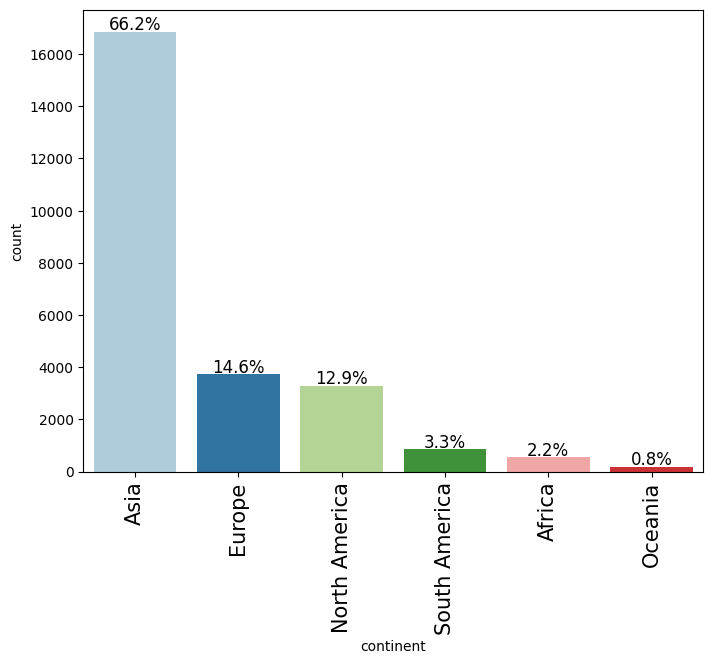

In [ ]:
labeled_barplot(df,"continent", perc=True)



*   Almost 66 percent of the employees are from Asia.
*   14 percent of employees come from Europe and 13 percent come from North America.



# Observation on education_of_employee

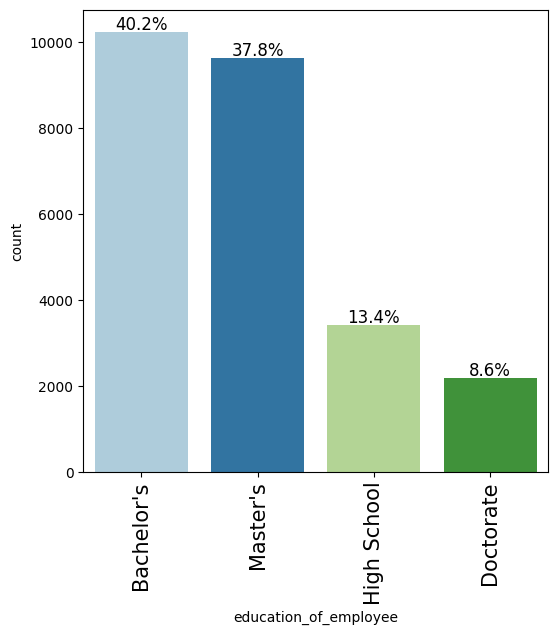

In [ ]:
labeled_barplot(df,"education_of_employee", perc=True)



*   40 percent of employees have a Bachelor's degree followed closely by 37 percent of them having Masters' dergree.
*   Only 8 percent of employees have a doctorate.



# Observation on   previous job_experience

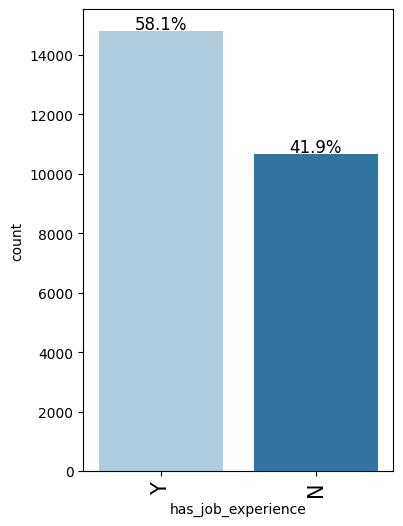

In [ ]:
labeled_barplot(df,"has_job_experience", perc=True)



*   Around 58 percent of employees have job experience and 42 percent do not have experience.



#Observation on  no_of_employees  

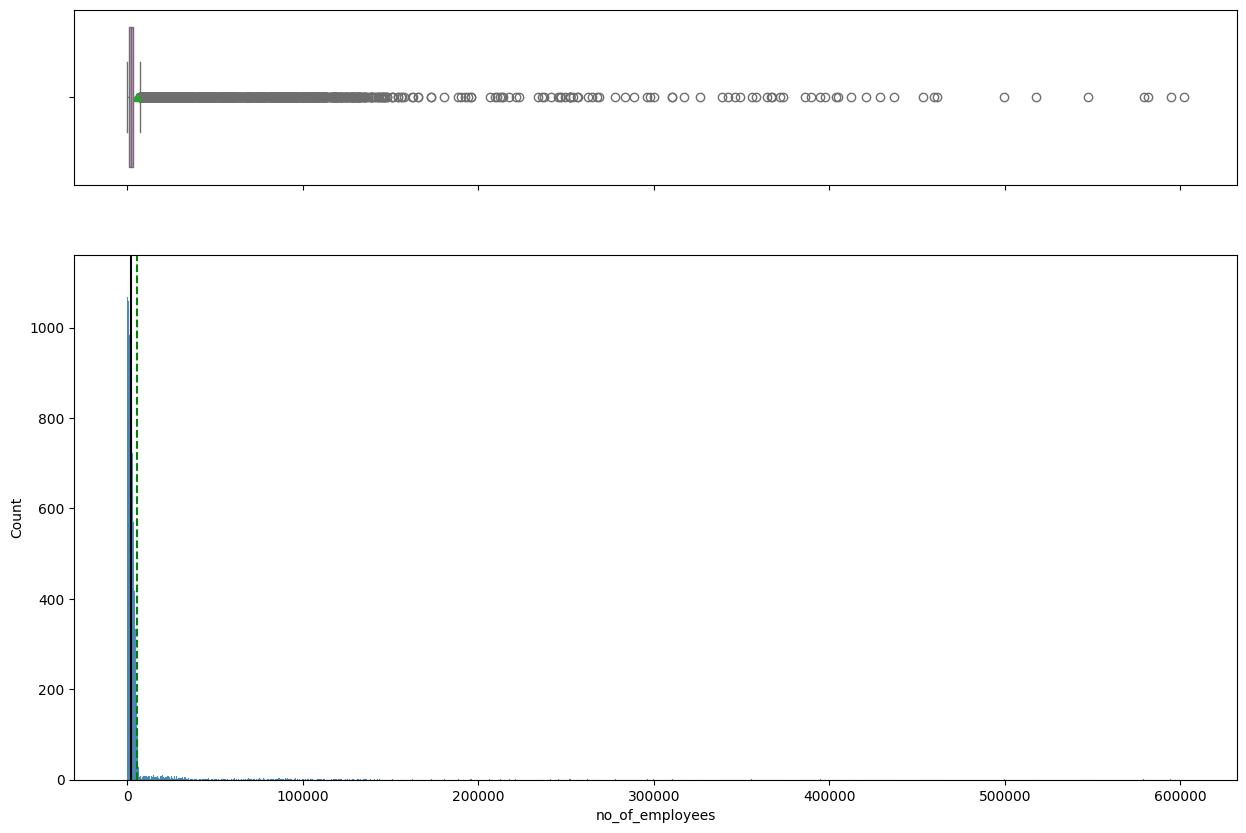

In [ ]:
histogram_boxplot(df, "no_of_employees")



*  This is a highly right skewed graph with many outliers on the right.




# Observation on requires_job_training

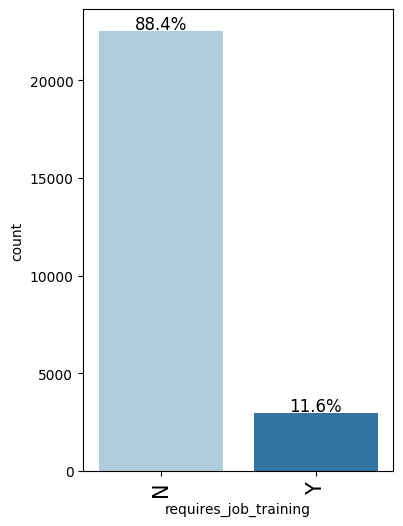

In [ ]:
labeled_barplot(df,"requires_job_training", perc=True)



*   Almost 88 percent of employees do not require any Job training.




# Observations on   region_of_employment

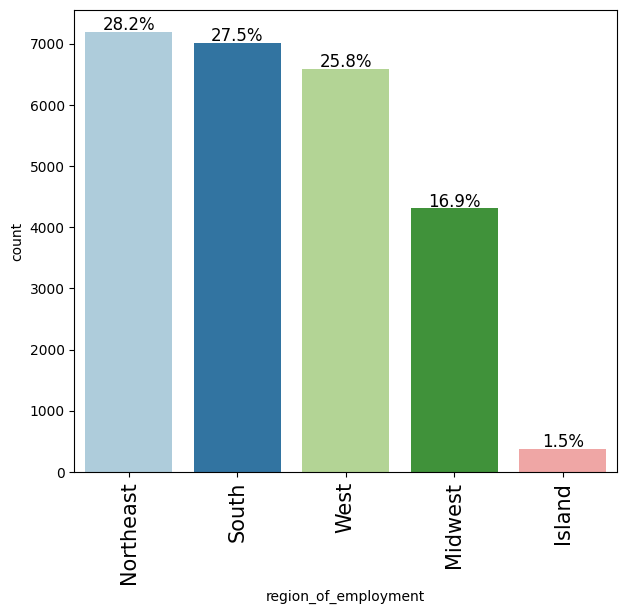

In [ ]:
labeled_barplot(df, "region_of_employment",perc=True)

# Observation on prevailing_wage

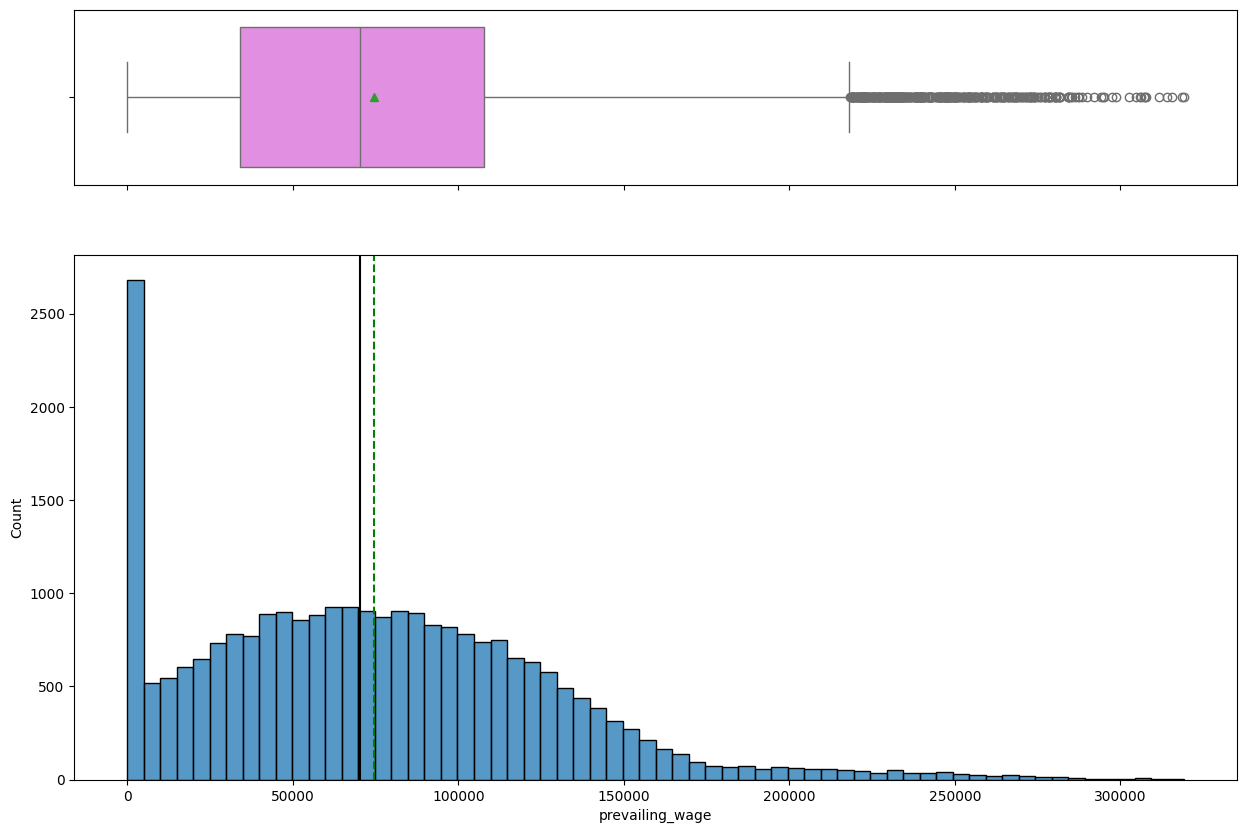

In [ ]:
histogram_boxplot(df, "prevailing_wage")



*   As we can see the plot is slightly right skewed with many outliers on the right.


# Observation on unit_of_wage   

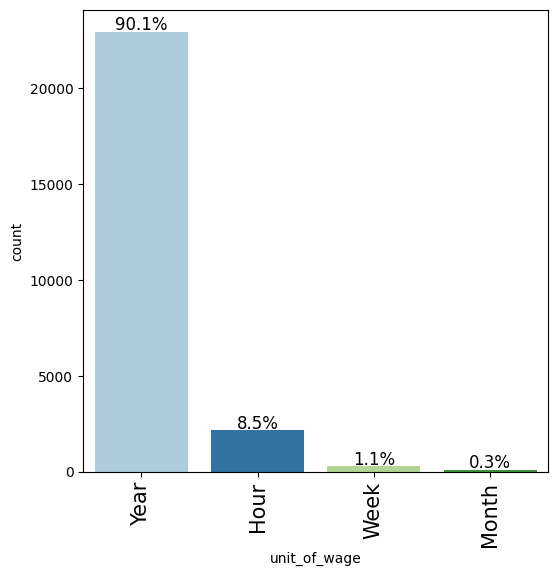

In [ ]:
labeled_barplot(df,'unit_of_wage',perc=True)

# Observations on full_time_position  

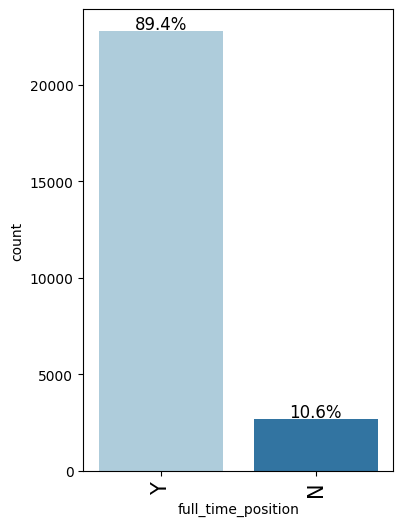

In [ ]:
labeled_barplot(df,"full_time_position", perc=True)

# Observations on case_status     

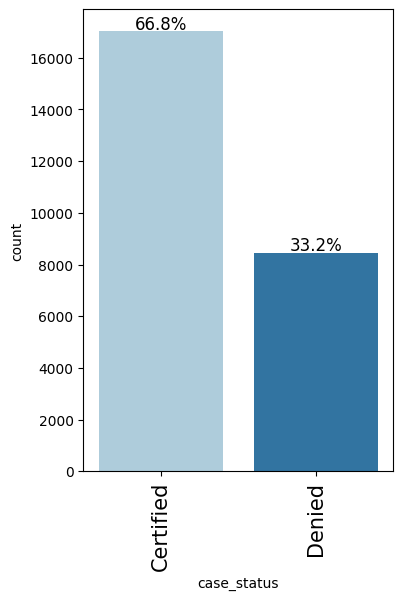

In [ ]:
labeled_barplot(df,"case_status", perc=True)

# Bivariate Analysis

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

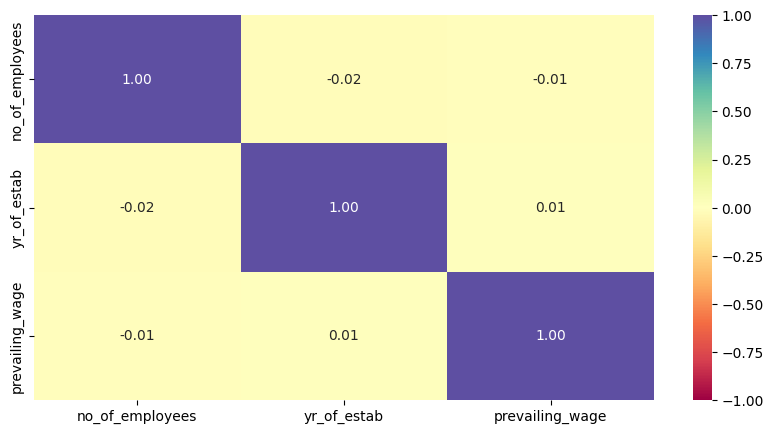

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Functions for further analysis

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Observations on Higher education and visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


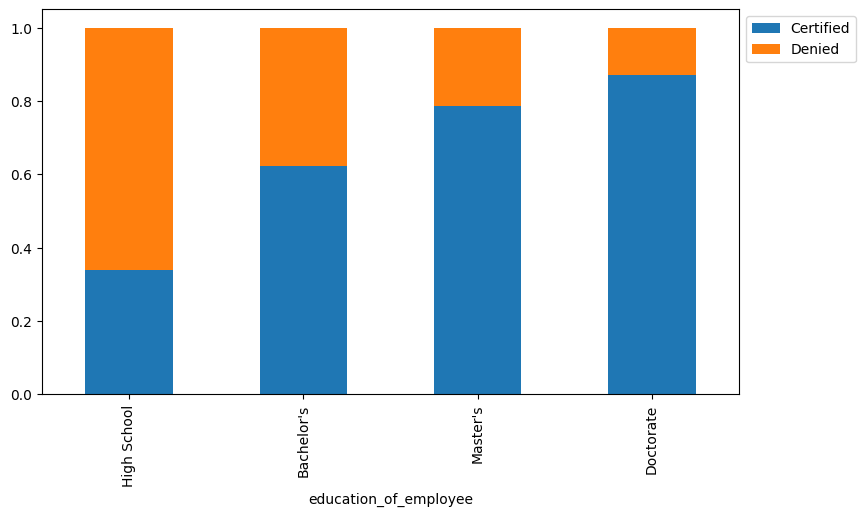

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")



*   As we can see higher the education of an employee the chances of the them getting certified are higher.
*   The employees with Doctorate have the most certified cases followed by the employees with Masters degree.



#Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


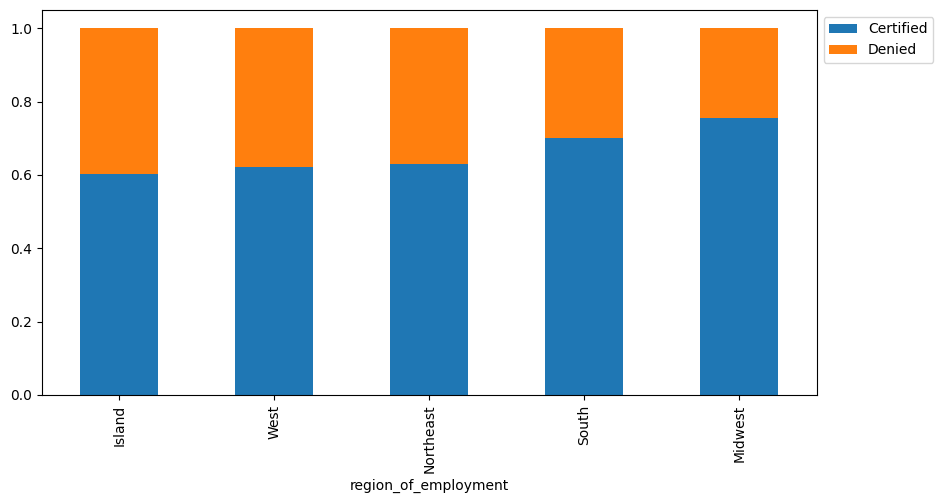

In [ ]:
stacked_barplot(df, "region_of_employment", "case_status")



*  The Midwest region has the highest number of visa certifications followed by the South region.




#Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

In [ ]:
crosstab_dataframe = pd.crosstab(df['education_of_employee'], df['region_of_employment'])





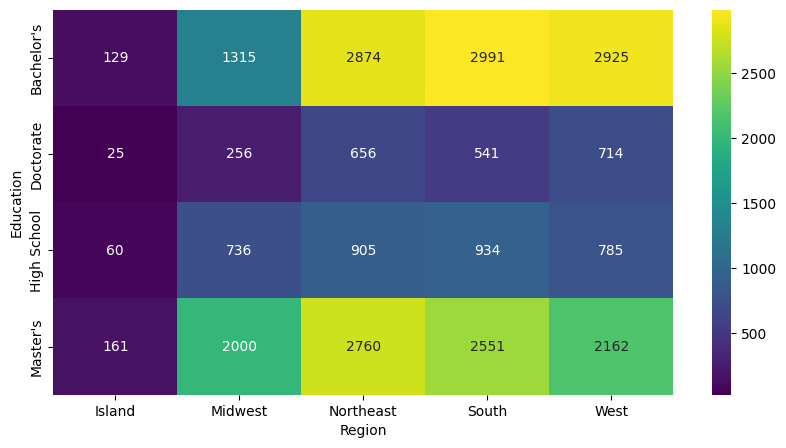

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab_dataframe,
    annot=True,
    fmt="g",
    cmap="viridis")

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

# Observations on Visa status and Continents

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


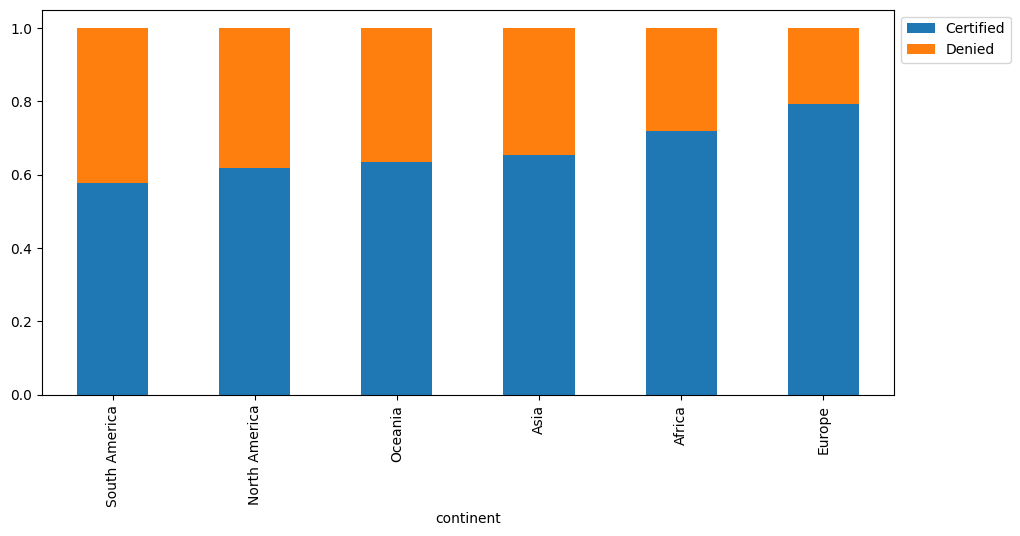

In [ ]:
stacked_barplot(df, "continent", "case_status")



*  As we can see Europe has the highest number of certified cases followed by Africa and Asia.
*  South America has the least number of certified cases.



# Observations on work experience and visa status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


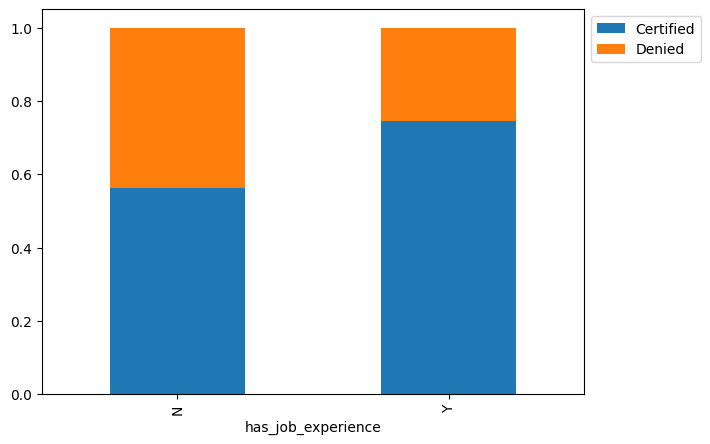

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")



*   As we can see employees with work experience have more chances of their visa being certified.



# Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


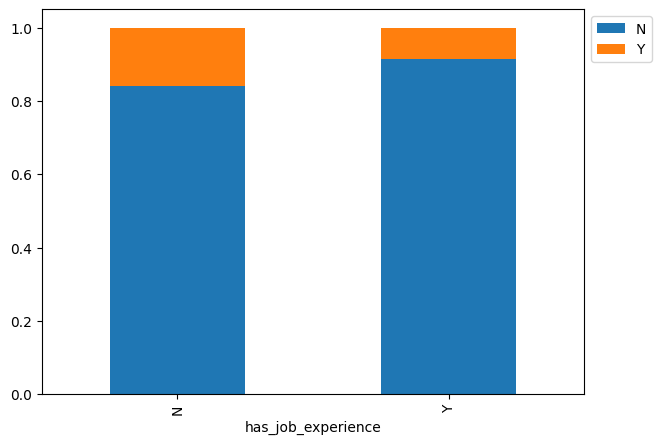

In [ ]:
stacked_barplot(df, "has_job_experience", "requires_job_training")



*   If the employee has previous job experience they are less likely to require on the job training.




# Observation on pay unit and visa status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


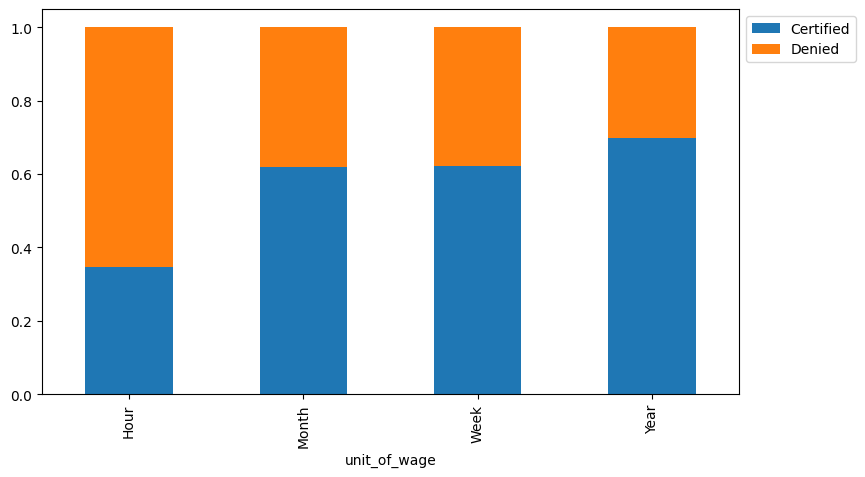

In [ ]:
stacked_barplot(df, "unit_of_wage", "case_status")



*   Employees whose unit of wage is 'year' have high chances of their visa being certified.
*   Employees whose unit of wage is 'hour' have least chances of their visa being certified.





# Obsevations on prevailing wage and visa status



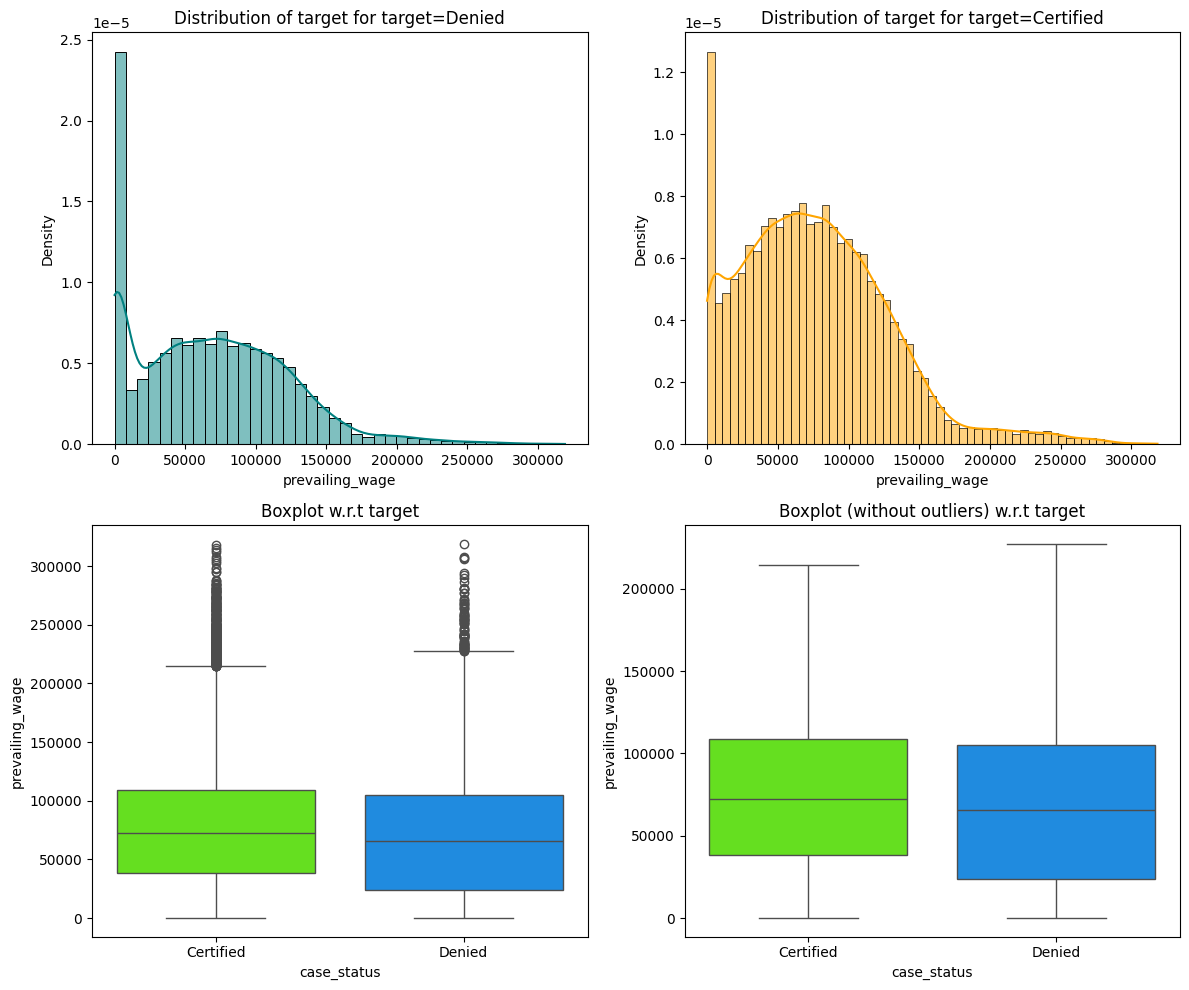

In [ ]:
distribution_plot_wrt_target(df,'prevailing_wage','case_status')

# Checking if the prevailing wage is similar across all the regions of the US

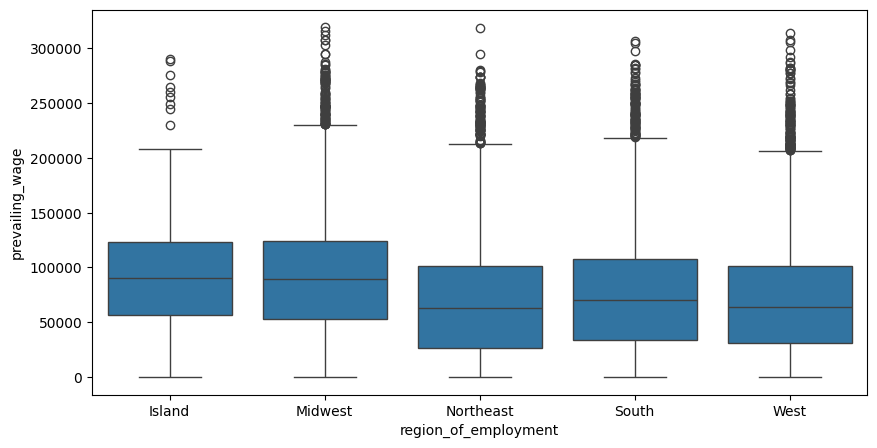

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='region_of_employment',y='prevailing_wage')
plt.show()



*  The average prevailing wage of employees in the Island and midwest region is greater as compared to employees in other regions.




unit_of_wage          Hour  Month  Week   Year    All
region_of_employment                                 
All                   2157     89   272  22962  25480
Northeast              865     29    92   6209   7195
South                  696     28    68   6225   7017
West                   432     19    77   6058   6586
Midwest                146     13    32   4116   4307
Island                  18      0     3    354    375
------------------------------------------------------------------------------------------------------------------------


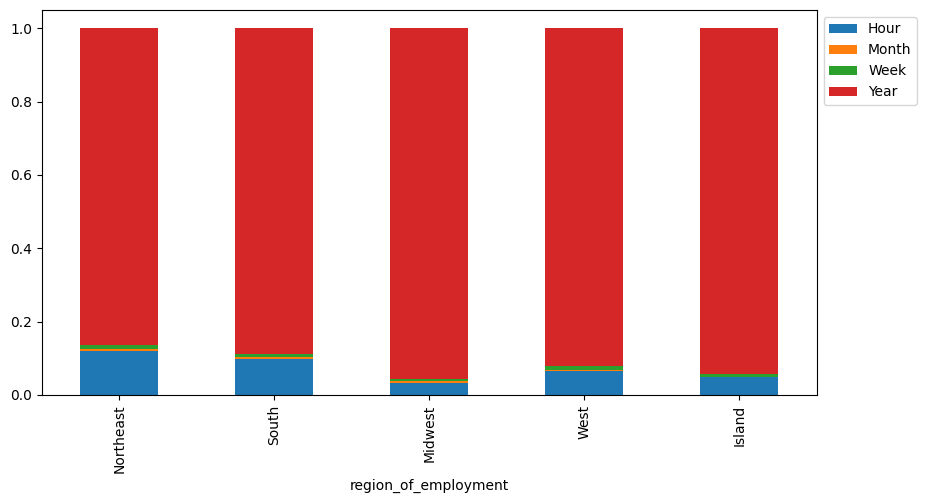

In [ ]:
stacked_barplot(df, "region_of_employment", "unit_of_wage")



*   As we can see the 'year' is the most popular unit of wage across all regions.




## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#Outlier Detection

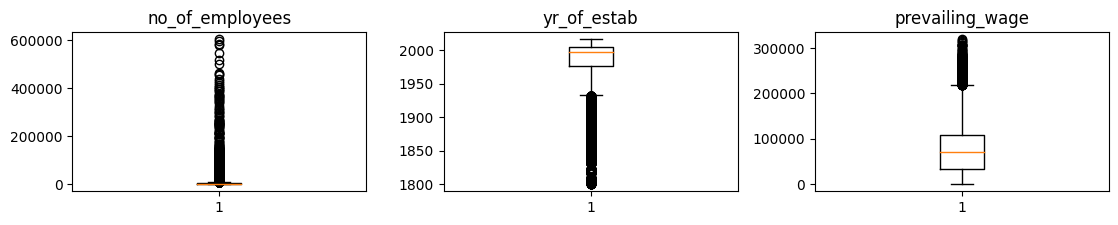

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6,4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()



*   There are quite a few outliers in the data. However, we will not treat them as they are proper values.




#Data Preparataion for model building

*  When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets
*  This is done using the stratify parameter in the train_test_split function.



In [ ]:
df['case_status'] = df['case_status'].apply(lambda x : 1 if x== 'Certified' else 0)

X = df.drop(['case_status'],axis=1)
y = df['case_status']

X = pd.get_dummies(X,drop_first=True)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64




# Model evaluation criterion

*   Model predicts that the visa application will get certified but in reality, the visa application should get denied.
*   Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

*   Both these cases are important as:
*   If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

*  If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.
*  F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.

*  We will use balanced class weights so that model focuses equally on both classes.












#  Functions to calculate different metrics and confusion matrix

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree Model

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

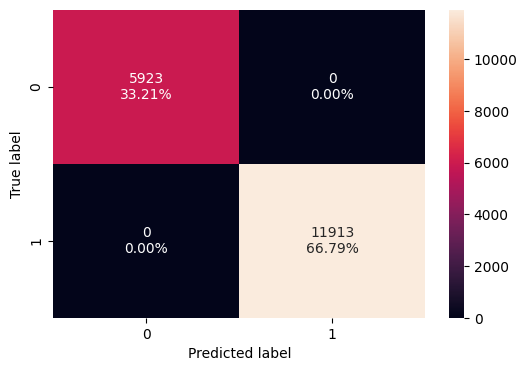

In [ ]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


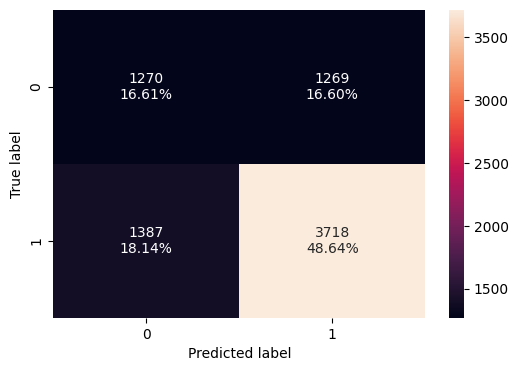

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.652538  0.728306   0.745538  0.736821




*   The decision tree is overfitting the data.




## Building bagging and boosting models

# Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

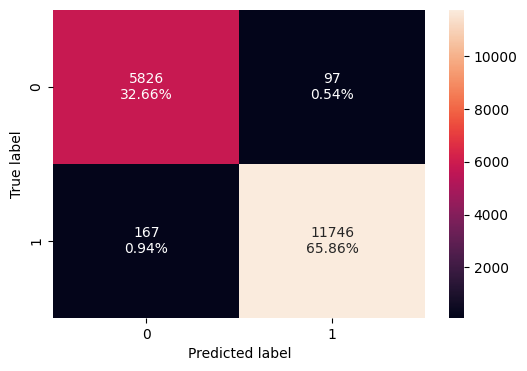

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


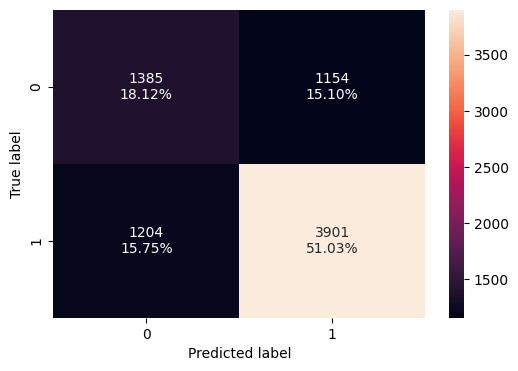

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913




*   Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of F1 scores.



#Hyperparameter Tuning - Bagging Classifier

In [ ]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned,parameters , scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

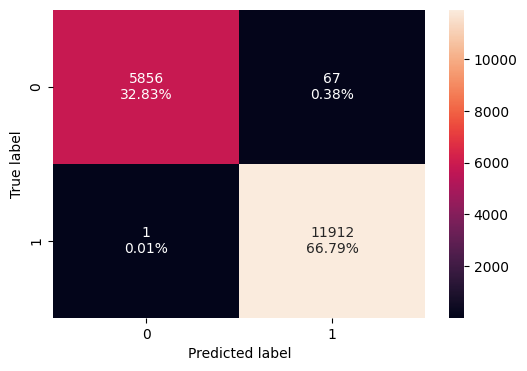

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
bagging_estimator_tuned_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994407  0.997154


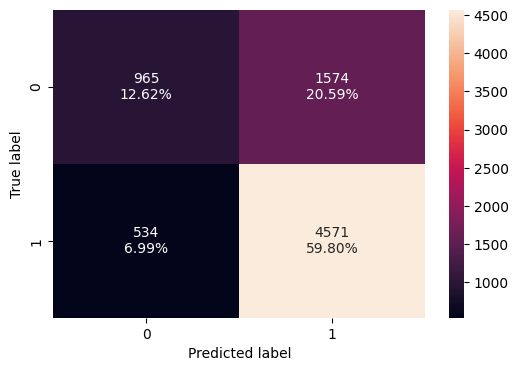

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
bagging_estimator_tuned_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622




*   The F1 scores have improved but the mode is still overfitting.



# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

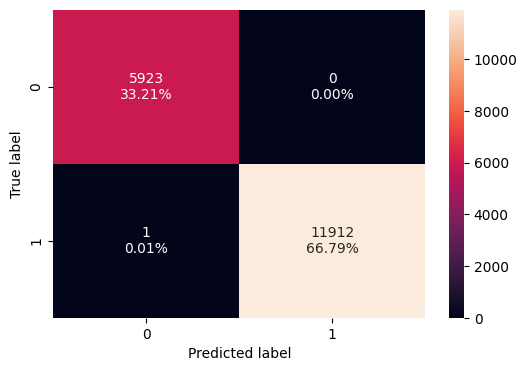

In [ ]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


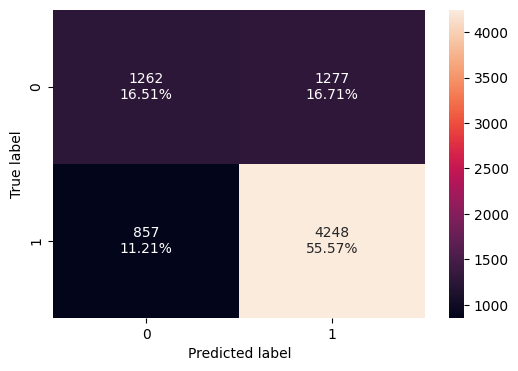

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247




*  Random Forest is overfitting the data. the F1 score has reduced.




# Hyperparameter Tuning Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

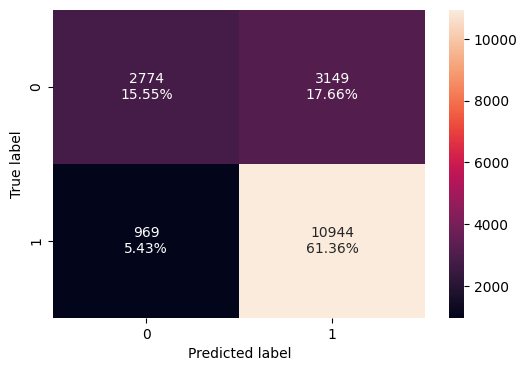

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train,y_train)

In [ ]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652


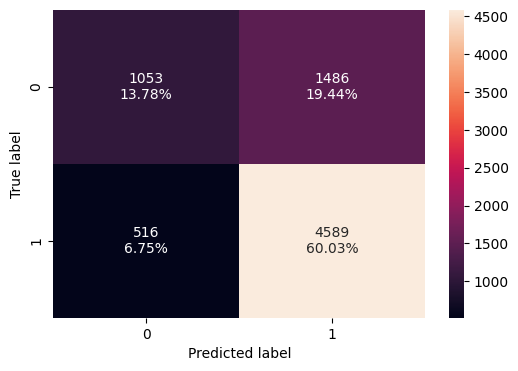

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test,y_test)

In [ ]:
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned, X_test,y_test)
print("Test performance \n",rf_tuned_model_test_perf)

Test performance 
    Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093




*   This model is performing better with less diffrence on the scores on training data and testing data.




In [ ]:
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.234452
prevailing_wage                    0.150029
has_job_experience_Y               0.118696
education_of_employee_Master's     0.085766
no_of_employees                    0.067280
yr_of_estab                        0.058228
education_of_employee_Doctorate    0.055792
unit_of_wage_Year                  0.046702
continent_Europe                   0.041715
region_of_employment_Midwest       0.024973
continent_Asia                     0.016195
region_of_employment_West          0.015561
full_time_position_Y               0.014733
region_of_employment_South         0.014553
continent_North America            0.013878
requires_job_training_Y            0.012244
region_of_employment_Northeast     0.010722
continent_South America            0.008815
unit_of_wage_Week                  0.004329
continent_Oceania                  0.003455
unit_of_wage_Month                 0.001881


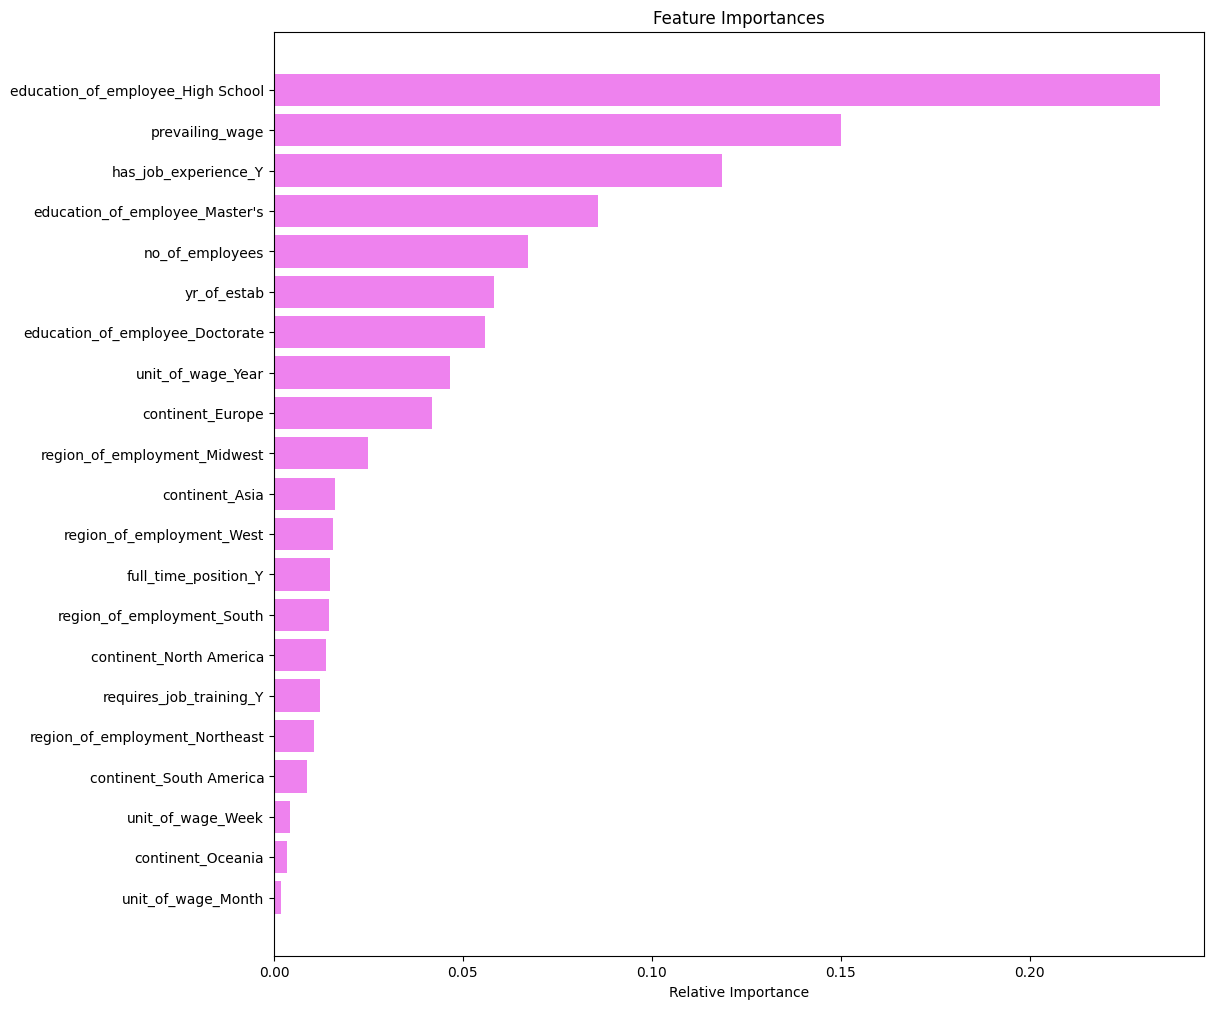

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   The model is giving most importance to 'education _of_employee_Highschool'
*  The next important feature is prevailing wage and having previous experience.



# Boosting - Model Building and Hyperparameter Tuning

# AdaBoost Classifier

In [ ]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)


AdaBoostClassifier(random_state=1)

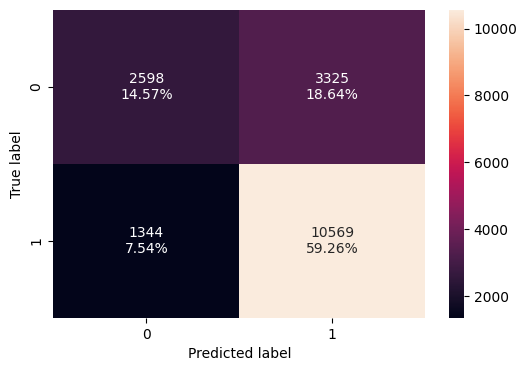

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_train,y_train)

In [ ]:
ab_classifier_model_train_perf =model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


**Checking the model performance on Test set**

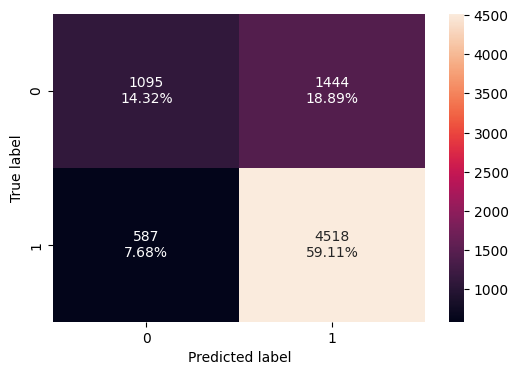

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_test,y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481




*   The Adaboost model is doing well on both training set and testing set.



**Hypertuning the model**

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.754429  0.883908   0.778443  0.82783


In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test,y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.741104  0.876004   0.768649  0.818823




*   As we can see there is only slight improvement in the scores.




In [ ]:
# importance of features in the tree building
print(pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_Master's     0.121154
education_of_employee_High School  0.115871
has_job_experience_Y               0.097648
prevailing_wage                    0.096553
education_of_employee_Doctorate    0.078167
continent_Europe                   0.073872
region_of_employment_Midwest       0.065872
no_of_employees                    0.063450
region_of_employment_South         0.059009
yr_of_estab                        0.042249
unit_of_wage_Year                  0.039454
continent_South America            0.035635
continent_North America            0.033977
full_time_position_Y               0.028849
region_of_employment_West          0.021730
requires_job_training_Y            0.016896
continent_Asia                     0.005299
region_of_employment_Northeast     0.003660
continent_Oceania                  0.000654
unit_of_wage_Month                 0.000000
unit_of_wage_Week                  0.000000


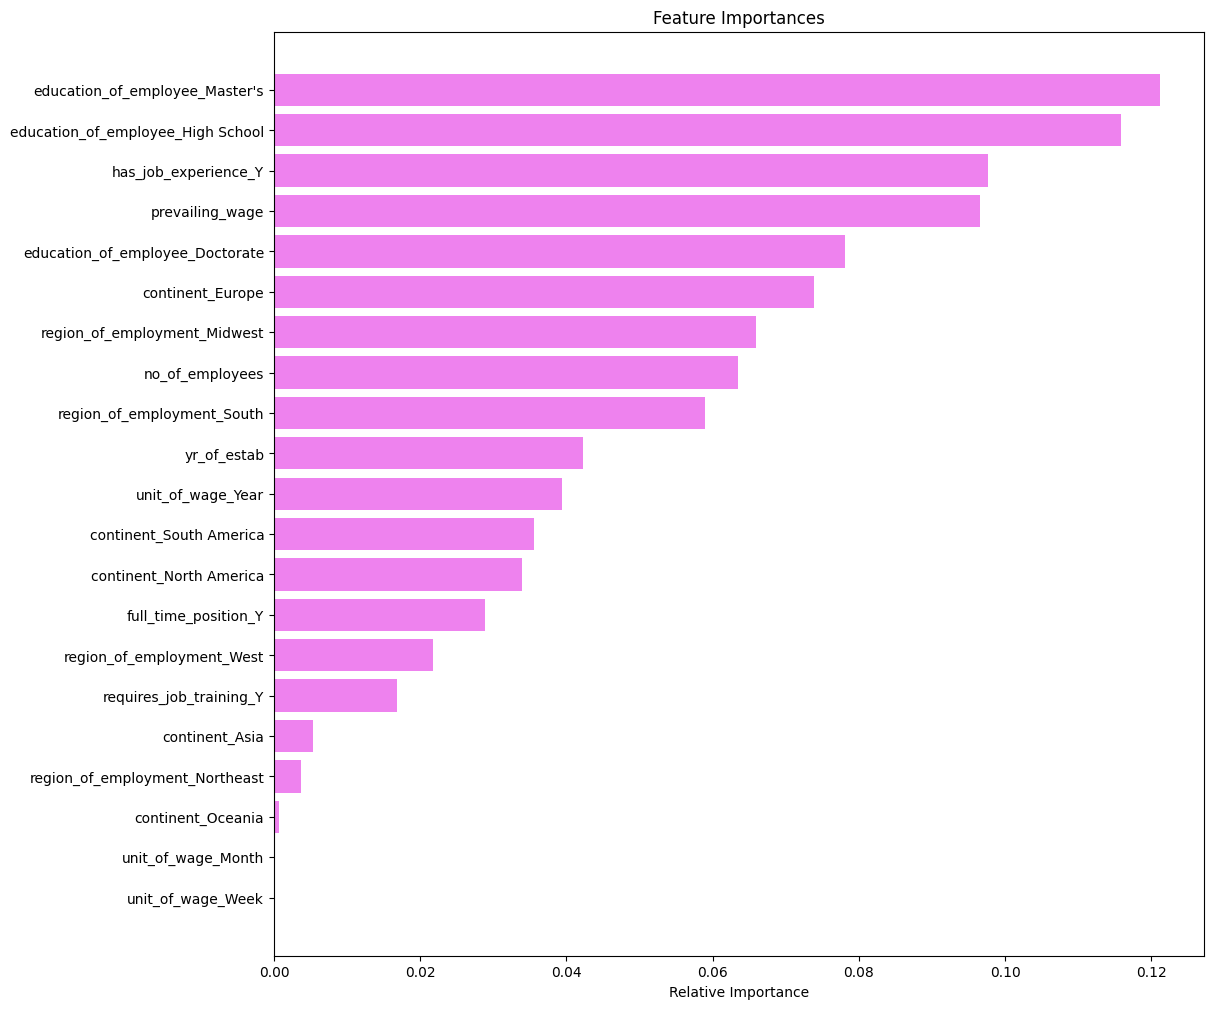

In [ ]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   The model is giving the most importance to education of employees i.e Masters and High school.
*   The next importanat features are having job experience and prevailing wage.


# Gradient Boosting

In [ ]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
gb_estimator_model_train_perf = model_performance_classification_sklearn(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


In [ ]:
gb_estimator_model_test_perf =  model_performance_classification_sklearn(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927




*   The model is performing good on both training set and testing set.




**Hypertuning the model**

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=50, random_state=1,
                           subsample=0.9)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.756167  0.885251   0.779568  0.829055


In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Testing performance \n",gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743721  0.878746   0.769997  0.820785


In [ ]:
print(pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.286251
has_job_experience_Y               0.166859
prevailing_wage                    0.122603
education_of_employee_Master's     0.102982
education_of_employee_Doctorate    0.091519
continent_Europe                   0.058844
unit_of_wage_Year                  0.043913
region_of_employment_Midwest       0.032550
region_of_employment_South         0.022282
region_of_employment_West          0.013991
continent_North America            0.013823
continent_Asia                     0.008202
continent_South America            0.008130
yr_of_estab                        0.008004
no_of_employees                    0.006494
full_time_position_Y               0.006270
region_of_employment_Northeast     0.005355
requires_job_training_Y            0.001464
continent_Oceania                  0.000464
unit_of_wage_Month                 0.000000
unit_of_wage_Week                  0.000000


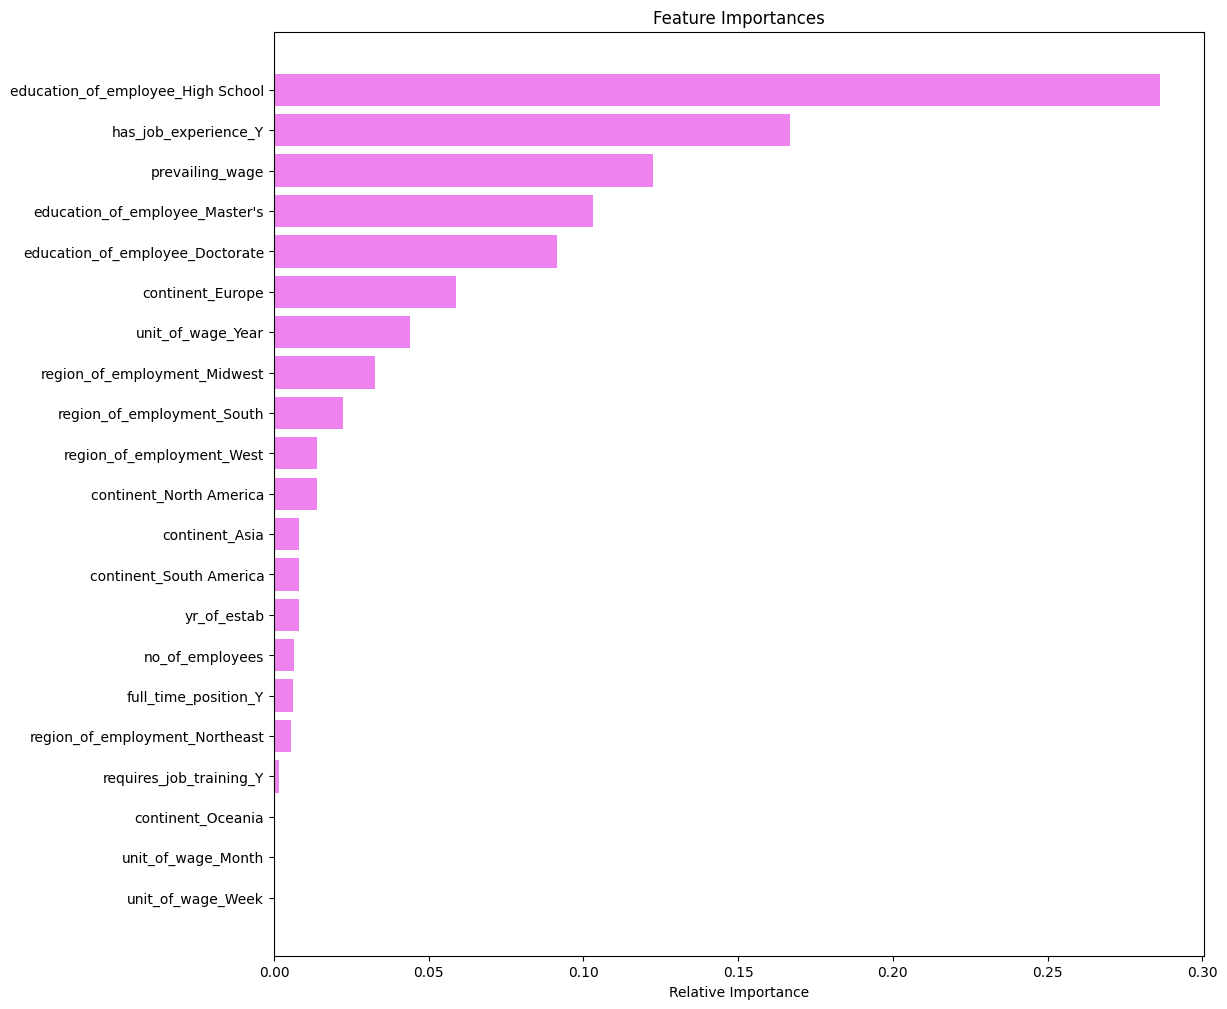

In [ ]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# XG Boost

In [ ]:
xgb_classifier=XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
print("Training performance \n",xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.850807  0.935952   0.854537  0.893394


In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test,y_test)
print("Testing performance \n",xgb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.729984  0.851518   0.768972  0.808143




*   As we can see the model is performing well on training set but not on test set hence its an overfitting model.




**Hypertuning the model**

In [ ]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned ,X_train, y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76211,0.888189,0.784243,0.832986


In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned ,X_test, y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744898,0.877767,0.771655,0.821298




*   The model is performing very well on both train set and testing set. There is no overfitting as well.




In [ ]:
print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.402008
has_job_experience_Y               0.126927
education_of_employee_Master's     0.073238
education_of_employee_Doctorate    0.060986
continent_Europe                   0.051092
unit_of_wage_Year                  0.047358
region_of_employment_Midwest       0.036367
region_of_employment_South         0.028912
prevailing_wage                    0.022518
full_time_position_Y               0.020815
region_of_employment_Northeast     0.020383
region_of_employment_West          0.016921
continent_Asia                     0.015345
continent_South America            0.013509
continent_North America            0.013096
requires_job_training_Y            0.012313
unit_of_wage_Week                  0.008181
yr_of_estab                        0.008017
continent_Oceania                  0.007809
no_of_employees                    0.007194
unit_of_wage_Month                 0.007011


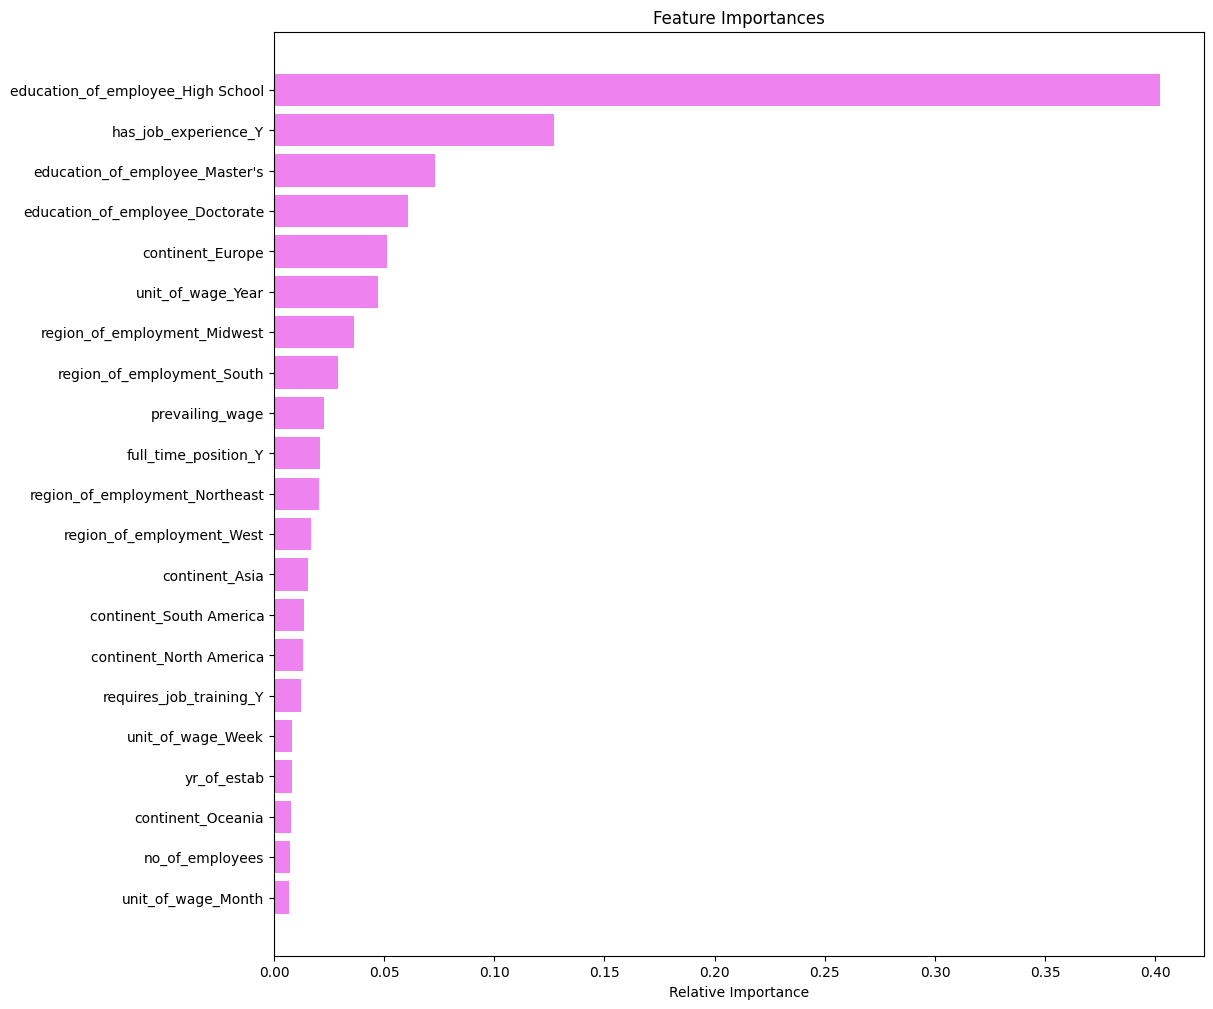

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   The most importance is given to 'high school' education in this model followed by 'have_job_experience.




# Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned


stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=50,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

In [ ]:
stacking_estimator_model_train_perf = model_performance_classification_sklearn(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.764745  0.887182   0.787497  0.834373


In [ ]:
stacking_estimator_model_test_perf = model_performance_classification_sklearn(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision      F1
0  0.742282  0.873653   0.770959  0.8191




*   The model is slightly overfitting.



# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [

        dtree_model_train_perf.T,
        bagging_model_train_perf.T,
       bagging_estimator_tuned_train_perf.T,
        rf_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_estimator_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_estimator_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",

    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.996187,0.996187,0.999944,0.769119,0.738226,0.754429,0.758802,0.756167,0.850807,0.762110,0.764745
Recall,1.0,0.999916,0.999916,0.999916,0.918660,0.887182,0.883908,0.883740,0.885251,0.935952,0.888189,0.887182
Precision,1.0,0.994407,0.994407,1.000000,0.776556,0.760688,0.778443,0.783042,0.779568,0.854537,0.784243,0.787497
F1,1.0,0.997154,0.997154,0.999958,0.841652,0.819080,0.827830,0.830349,0.829055,0.893394,0.832986,0.834373


In [ ]:
# testing data performance comparison

models_test_comp_df = pd.concat(
    [

        dtree_model_test_perf.T,
        bagging_model_test_perf.T,
       bagging_estimator_tuned_test_perf.T,
        rf_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_estimator_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_estimator_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",

    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.652538,0.724228,0.724228,0.720827,0.738095,0.734301,0.741104,0.744767,0.743721,0.729984,0.744898,0.742282
Recall,0.728306,0.895397,0.895397,0.832125,0.898923,0.885015,0.876004,0.876004,0.878746,0.851518,0.877767,0.873653
Precision,0.745538,0.743857,0.743857,0.768869,0.755391,0.757799,0.768649,0.772366,0.769997,0.768972,0.771655,0.770959
F1,0.736821,0.812622,0.812622,0.799247,0.820930,0.816481,0.818823,0.820927,0.820785,0.808143,0.821298,0.819100




*   In comparing the different models Tuned Gradient boost classifier is the best model here with F1 SCORE OF 82 percent. The next best model is the Adaboost classifier.



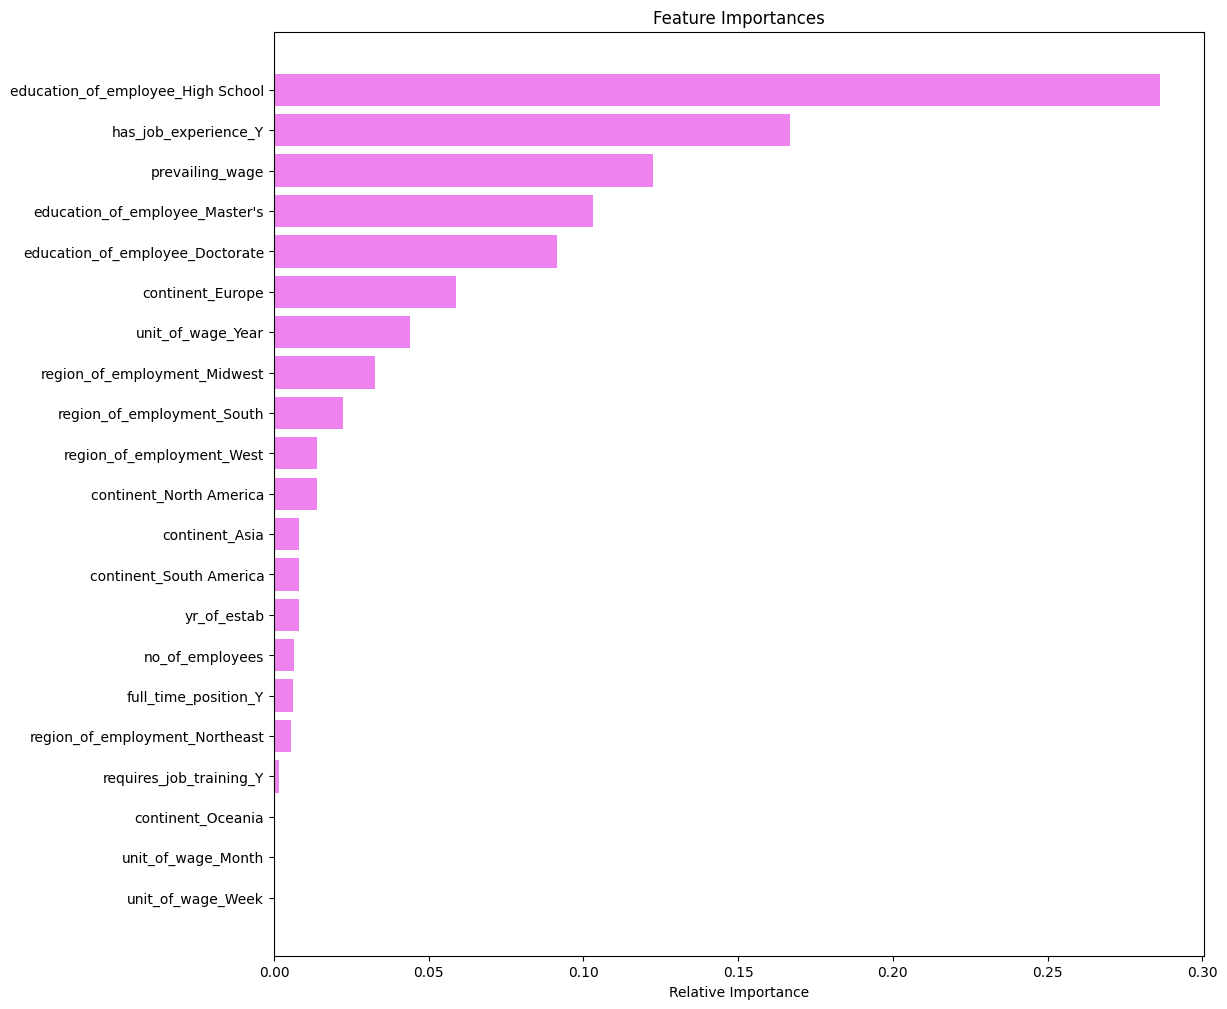

In [ ]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations



*  Majority of the applicants are from Asia.
*  Most of the employees have education level as'Bachelors' followed by 'Masters'
*   Least number of employees have education level as'Doctorate'
*   Around 58 percent of employees have previous job experience and 88 percent do not require any on the job training.
*  Northeast is the most popular region among employees followed by South and West regions.
*  89 percent of employees have full time positions and 90 percent have their unit of wage as'year'.
*   Employees having 'Doctorate' are preferred for visa certifications followed by employees who have 'Masters'.
*   Midwest is the most popular region for visa certifications followed by South and Northeast region.
*   Employees from Europe are preferred for Visa certification followed by employees from Africa and Asia.
*   Employees who have previous work experience do not require on the job training and are preferred for Visa certification.
*   The average prevailing wages of the employees whose visa is certifed is greater than the average prevailing wage of employees whose visa is denied.
*    Tuned Gradient boost classifier model is the best model here , based on this importance should be given to the applicants having more higher education, having previous work experience, prevaling wage etc.
*   These criteria based model will ensure that there is no shortage of employees and there is no missed oppurtunity in attractiong the right talent.
*   Further study is recommended to find the sector of employment, previous background check of employees, number of years of experience the employee has etc.


















In [ ]:
!pip show nbconvert

Name: nbconvert
Version: 6.5.4
Summary: Converting Jupyter Notebooks
Home-page: https://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: beautifulsoup4, bleach, defusedxml, entrypoints, jinja2, jupyter-core, jupyterlab-pygments, lxml, MarkupSafe, mistune, nbclient, nbformat, packaging, pandocfilters, pygments, tinycss2, traitlets
Required-by: jupyter-server, nbclassic, notebook


In [ ]:
!jupyter nbconvert --to html /Copy_of_DSBA_Project_ET_EasyVisa_Fullcode_V1.ipynb

[NbConvertApp] WARNING | pattern '/Copy_of_DSBA_Project_ET_EasyVisa_Fullcode_V1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyter